## Multiple Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
from mpl_toolkits.mplot3d import Axes3D

data=pd.read_csv(r'C:/Users/Shambhavi/Downloads/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


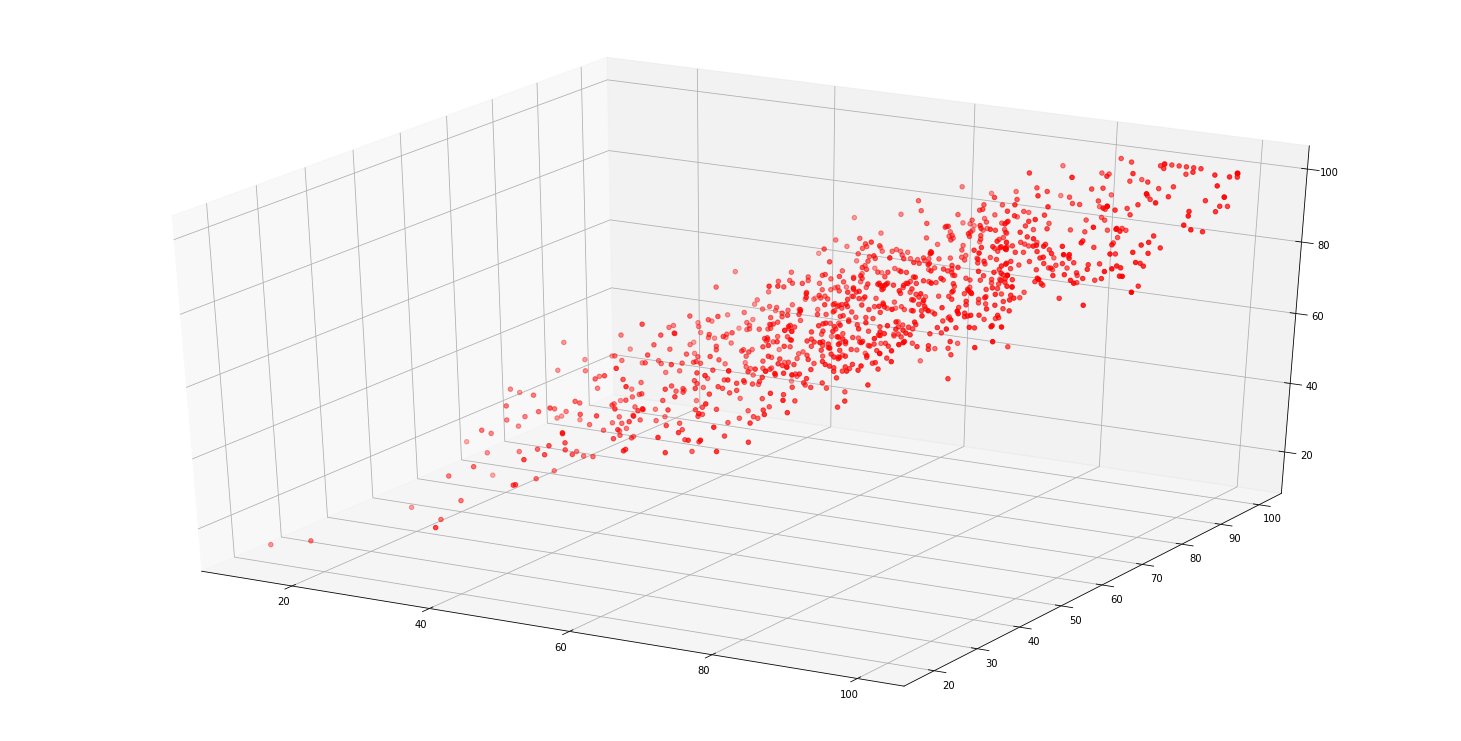

In [7]:
math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write,color='red')
plt.show()

In [8]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001   # learning rate

In [11]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

In [12]:
initial_cost=cost_function(X,Y,B)
print(initial_cost)

2470.11


In [13]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    
    for iteration in range(iterations):
        
        #hypothesis values
        h=X.dot(B)
        #differntiate b/w hypothesis and actual Y
        loss=h-Y
        #gradient Calculation
        gradient=X.T.dot(loss)/m
        #changing values of B using Gradient
        B=B-alpha*gradient
        #New cost value
        cost=cost_function(X,Y,B)
        cost_history[iteration]=cost
        
    return B,cost_history        

In [14]:
newB,cost_history=gradient_descent(X,Y,B,alpha,100000)

print(newB)
print(cost_history[-1])   # gives the minimum value

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [17]:
def rmse(Y,Y_pred):
    rmse=np.sqrt(sum((Y-Y_pred)**2)/len(Y))
    return rmse

def r2_score(Y,Y_pred):
    mean_y=np.mean(Y)
    ss_tot=sum((Y-mean_y)**2)
    ss_res=sum((Y-Y_pred)**2)
    r2=1-(ss_res/ss_tot)
    return r2

Y_pred=X.dot(newB)
print(rmse(Y,Y_pred))
print(r2_score(Y,Y_pred))

4.577143972727789
0.9097223273061553


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use rank 1 matrix in scikit learn
X=np.array([math,read]).T
Y=np.array(write)

#creating model
reg=LinearRegression()
reg=reg.fit(X,Y)
# Y prediction
Y_pred=reg.predict(X)

#calculating RMSE and R2 Score

mse=mean_squared_error(Y,Y_pred)   #mse is used for error and score is used for accuracy



rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)


print(rmse)
print(r2_score)

4.572887051836439
0.9098901726717316
